In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
path = 'https://raw.githubusercontent.com/Kamil128/SDA_Excercise/main/data/wine/WineQT.csv'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


1. Sprawdzanie rodzaju danych
- dla danych na których bazujemy są float64, na wartości, które chcemy predyktować jest int64, więc nie trzeba nic zmieniać. 
- same dane ciągłe, nie mamy danych kategorycznych.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


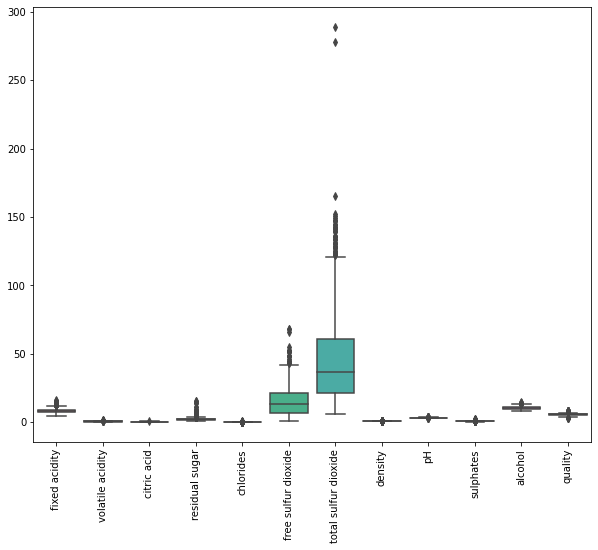

In [8]:
plt.figure(figsize=(10,8))
g=sns.boxplot(data=df.iloc[:,:-1])
g.xaxis.set_tick_params(rotation=90)

<AxesSubplot:>

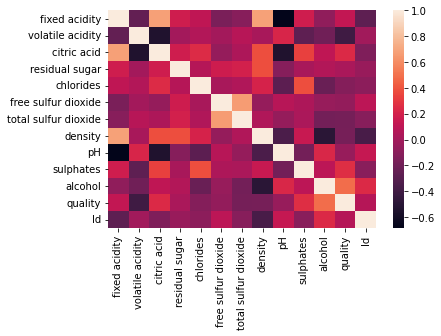

In [9]:
count_corr=df.corr()
sns.heatmap(count_corr)

Usuwamy kolumnę Id, ponieważ nie będzie nam potrzebna do predykcji - z pozostałych będziemy korzystali.

In [10]:
col_to_drop = ['Id']
df.drop(col_to_drop, axis=1, inplace=True)

In [11]:
X = df.drop(['quality'], axis=1)
y = df['quality']

y=(y<=5).astype(int)

Pierwotnie chcieliśmy predyktować wszystkie z klasy (od 3 - 8), ale ponieważ dla klas 3,4,8 jest bardzo mało danych wejściowych i model dawał bardzo słabe wyniki, bo nie miał na czym się uczyć, zmienilismy podejście na podejście binarne i dzielimy wina na "dobre"(y>5) i "nie dobre"(y<5)

<AxesSubplot:xlabel='quality', ylabel='count'>

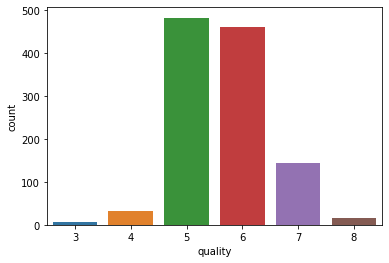

In [12]:
sns.countplot(x="quality", data=df)

In [13]:
pd.Series(y).value_counts().sort_index()

0    621
1    522
Name: quality, dtype: int64

Tworzenie zbioru testowego i treningowego. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,
                                                      test_size=0.2,
                                                      stratify=y)

Tworzenie pipelinu

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline(
    [
     ('standard_scaller', StandardScaler()),
    ]
)

X_train_tr = num_pipeline.fit_transform(X_train)
X_test_tr = num_pipeline.fit_transform(X_test)

Wybór najlepszego modelu - dla naszego problemu binarnego zdecydowalismy się zastosować regresję logistyczna.
Stosuje się ją to predykcji klas binarnych dla dóch możliwych klas - tak jak w naszym przypadku.
Wykorzystuje funkcje sigmoidalna.

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tr, y_train)

LogisticRegression()

In [17]:
y_train_pred = lr.predict(X_train_tr)
y_test_pred = lr.predict(X_test_tr)

In [18]:
from xfile import print_classification_report
print_classification_report(y_train, y_train_pred, y_test, y_test_pred)

Train Classifiacation Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       497
           1       0.74      0.73      0.73       417

    accuracy                           0.76       914
   macro avg       0.76      0.76      0.76       914
weighted avg       0.76      0.76      0.76       914



Test Classifiacation Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       124
           1       0.72      0.74      0.73       105

    accuracy                           0.75       229
   macro avg       0.75      0.75      0.75       229
weighted avg       0.75      0.75      0.75       229



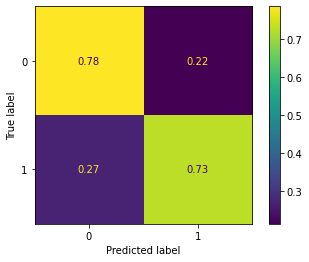

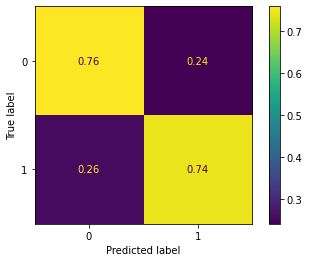

In [19]:
from xfile import plot_conf_matrix
plot_conf_matrix(y_train, y_train_pred, y_test, y_test_pred)

In [20]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay
# ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

# model SVM

In [94]:
from sklearn.svm import SVC
model = SVC(kernel='poly', C=0.5, gamma='scale')
model.fit(X_train_tr,y_train)

SVC(C=0.5, kernel='poly')

In [95]:
y_train_pred = model.predict(X_train_tr)
y_test_pred = model.predict(X_test_tr)

In [96]:
from xfile import print_classification_report
print_classification_report(y_train, y_train_pred, y_test, y_test_pred)

Train Classifiacation Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       497
           1       0.79      0.74      0.77       417

    accuracy                           0.80       914
   macro avg       0.80      0.79      0.79       914
weighted avg       0.80      0.80      0.79       914



Test Classifiacation Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       124
           1       0.78      0.70      0.73       105

    accuracy                           0.77       229
   macro avg       0.77      0.76      0.76       229
weighted avg       0.77      0.77      0.77       229



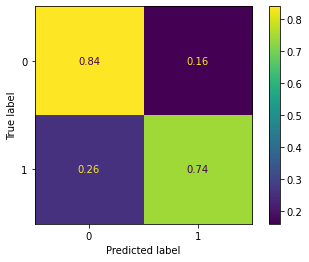

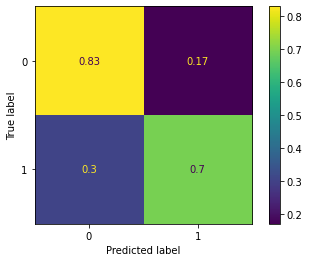

In [97]:
from xfile import plot_conf_matrix
plot_conf_matrix(y_train, y_train_pred, y_test, y_test_pred)